In [1]:
import os
import face_recognition
from PIL import Image, ImageDraw
import cv2
import numpy as np

In [2]:
def load_images(folder):
    images = []
    for filename in os.listdir(folder):
        image_path = os.path.join(folder, filename)
        image = face_recognition.load_image_file(image_path)
        images.append(image)
    return images

def encode_faces(images):
    face_encodings = []
    for image in images:
        face_encoding = face_recognition.face_encodings(image)
        if face_encoding:
            face_encodings.append(face_encoding[0])
    return face_encodings


Collect data


In [55]:

dataset_directory1 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/wonyoung/"
dataset_directory2 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/gaeul/"
dataset_directory3 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/rei/"
dataset_directory4 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/yujin/"
dataset_directory5 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/jiwon/"
dataset_directory6 = "C:/Mullika/MasterDegree/ComVision/DL-FOR-COMPUTER-VISION-main/DL-FOR-COMPUTER-VISION-main/week2/code/Working with Video/dataset/leeseo/"

# Replace these paths with your actual dataset paths
person1_images = dataset_directory1
person2_images = dataset_directory2
person3_images = dataset_directory3
person4_images = dataset_directory4
person5_images = dataset_directory5
person6_images = dataset_directory6

# Load images
person1_images = load_images(person1_images)
person2_images = load_images(person2_images)
person3_images = load_images(person3_images)
person4_images = load_images(person4_images)
person5_images = load_images(person5_images)
person6_images = load_images(person6_images)

# Encode faces
person1_face_encodings = encode_faces(person1_images)
person2_face_encodings = encode_faces(person2_images)
person3_face_encodings = encode_faces(person3_images)
person4_face_encodings = encode_faces(person4_images)
person5_face_encodings = encode_faces(person5_images)
person6_face_encodings = encode_faces(person6_images)

# Use average face encoding for each person
average_person1_face_encoding = sum(person1_face_encodings) / len(person1_face_encodings)
average_person2_face_encoding = sum(person2_face_encodings) / len(person2_face_encodings)
average_person3_face_encoding = sum(person3_face_encodings) / len(person3_face_encodings)
average_person4_face_encoding = sum(person4_face_encodings) / len(person4_face_encodings)
average_person5_face_encoding = sum(person5_face_encodings) / len(person5_face_encodings)
average_person6_face_encoding = sum(person6_face_encodings) / len(person6_face_encodings)

known_face_encodings = [average_person1_face_encoding, average_person2_face_encoding,average_person3_face_encoding,average_person4_face_encoding,average_person5_face_encoding,average_person6_face_encoding]
known_face_names = ["Wonyoung", "Gaeul","Rei","Yujin","Jiwon","Leeseo"]

Check Imbalance data

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame data
data = {'member': ['Wonyoung', 'Gaeul', 'Rei', 'Yujin', 'Jiwon', 'Leeseo'],
        'total_img': [len(person1_images), len(person2_images), len(person3_images), len(person4_images), len(person5_images), len(person6_images)]}

df = pd.DataFrame(data)
df


,member,total_img
0,Wonyoung,223
1,Gaeul,217
2,Rei,208
3,Yujin,219
4,Jiwon,210
5,Leeseo,206


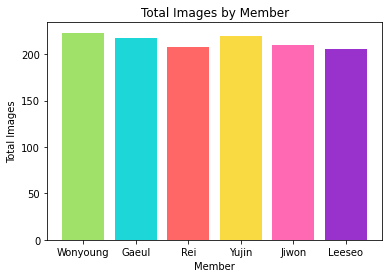

In [79]:
normalize_rgb = lambda rgb: (rgb[0] / 255, rgb[1] / 255, rgb[2] / 255)
colors = [normalize_rgb((160, 225, 105)), normalize_rgb((29,214,216)), normalize_rgb((255,102,102)),  normalize_rgb((249,218,66)), normalize_rgb((255,105,180)), normalize_rgb((153,50,204))]
218,112,214

plt.bar(df['member'], df['total_img'], color=colors)

plt.xlabel('Member')
plt.ylabel('Total Images')
plt.title('Total Images by Member')

plt.show()


Use compare_faces

In [60]:
def recognize_faces(unknown_image, known_face_encodings, known_face_names):
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding,tolerance=0.4)
        name = "Unknown"

        # Count the number of True matches
        num_matches = sum(matches)

        # Calculate accuracy as a percentage
        accuracy_percent = (num_matches / len(known_face_encodings)) * 100

        if True in matches:
            match_index = matches.index(True)
            name = known_face_names[match_index]
            label = f"{name} : ({accuracy_percent:.2f}%)"
 
          
            if match_index == 0:
                cv2.rectangle(frame, (left, top), (right, bottom), (105,225,160), 2)
                cv2.rectangle(frame, (left, bottom -20), (right, bottom), (105,225,160), cv2.FILLED)
                 # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255),2)
            elif match_index == 1:
                cv2.rectangle(frame, (left, top), (right, bottom), (216,214,29), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (216,214,29), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)   
            elif match_index == 2:
                cv2.rectangle(frame, (left, top), (right, bottom), (102,102,255), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (102,102,255), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            elif match_index == 3:
                cv2.rectangle(frame, (left, top), (right, bottom), (66,218,249), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (66,218,249), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            elif match_index == 4:
                cv2.rectangle(frame, (left, top), (right, bottom), (180,105,255), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (180,105,255), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
            elif match_index == 5:
                cv2.rectangle(frame, (left, top), (right, bottom), (204,50,153), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (204,50,153), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)    
       


# Start program
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Open a video capture object
video_path = './videos/hw2_hd.mp4'
cap = cv2.VideoCapture(video_path)


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_skip = 5  # Process every 5th frame
resize_factor = 0.7  # Resize frames to 50%
threshold = 0.3  # Adjust this threshold as needed

w = int(cap.get(3)) 
h = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('mv2_compare_faces.avi', fourcc, fps, (w,h))

while cap.isOpened():
    # Read a single frame
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break
   
    # Convert the frame from BGR to RGB (OpenCV uses BGR by default)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Create a Pillow ImageDraw object to draw on the image
    pil_image = Image.fromarray(rgb_frame)
    draw = ImageDraw.Draw(pil_image)


    # Recognize faces in the current frame
    frame_with_recognition = recognize_faces(rgb_frame, known_face_encodings, known_face_names)

    output_video.write(frame)

    # Display the resulting frame
    cv2.imshow('Face Recognition Result', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the video capture object and close all windows
cap.release()
output_video.release()
cv2.destroyAllWindows()




Use face_distance

In [80]:
def compare_faces(known_face_encodings, face_encoding, threshold=0.4):
    # Calculate cosine similarity between the known face encodings and the current face encoding
    similarities = face_recognition.face_distance(known_face_encodings, face_encoding)
    # Compare each similarity with the threshold to determine matches
    matches = list(similarity <= threshold for similarity in similarities)

    return matches, similarities



def recognize_faces(unknown_image, known_face_encodings, known_face_names):
    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        matches, similarities = compare_faces(known_face_encodings, face_encoding, threshold=0.4)
        name = "Unknown"

        # Find the index of the best match (lowest distance)
        best_match_index = np.argmin(similarities)

        # Get the accuracy percentage for the best match
        accuracy_percent = (1 - similarities[best_match_index]) * 100

        if matches[best_match_index]:
            match_index = matches.index(True)
            name = known_face_names[match_index]
            label = f"{name} : ({accuracy_percent:.2f}%)"

            if match_index == 0:
                cv2.rectangle(frame, (left, top), (right, bottom), (105,225,160), 2)
                cv2.rectangle(frame, (left, bottom -20), (right, bottom), (105,225,160), cv2.FILLED)
                 # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255),2)
            elif match_index == 1:
                cv2.rectangle(frame, (left, top), (right, bottom), (216,214,29), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (216,214,29), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)   
            elif match_index == 2:
                cv2.rectangle(frame, (left, top), (right, bottom), (102,102,255), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (102,102,255), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            elif match_index == 3:
                cv2.rectangle(frame, (left, top), (right, bottom), (66,218,249), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (66,218,249), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 255), 2)
            elif match_index == 4:
                cv2.rectangle(frame, (left, top), (right, bottom), (180,105,255), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (180,105,255), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)
            elif match_index == 5:
                cv2.rectangle(frame, (left, top), (right, bottom), (204,50,153), 2)
                cv2.rectangle(frame, (left, bottom-20), (right, bottom), (204,50,153), cv2.FILLED)
                # Label the face
                cv2.putText(frame, label, (left + 6, bottom-6), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,255,255), 2)    
       


# Start program
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Open a video capture object
video_path = './videos/hw2_hd.mp4'
cap = cv2.VideoCapture(video_path)


if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

frame_skip = 5  # Process every 5th frame
resize_factor = 0.7  # Resize frames to 50%
threshold = 0.3  # Adjust this threshold as needed

w = int(cap.get(3)) 
h = int(cap.get(4))
fps = cap.get(cv2.CAP_PROP_FPS)

fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('mv2_distance.avi', fourcc, fps, (w,h))

while cap.isOpened():
    # Read a single frame
    ret, frame = cap.read()

    # Break the loop if the video has ended
    if not ret:
        break

       
    # Convert the frame from BGR to RGB (OpenCV uses BGR by default)
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Create a Pillow ImageDraw object to draw on the image
    pil_image = Image.fromarray(rgb_frame)
    draw = ImageDraw.Draw(pil_image)

    # Recognize faces in the current frame
    frame_with_recognition = recognize_faces(rgb_frame, known_face_encodings, known_face_names)

    output_video.write(frame)

    # Display the resulting frame
    cv2.imshow('Face Recognition Result', frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break


# Release the video capture object and close all windows
cap.release()
output_video.release()
# output_video = cv2.VideoWriter('output2_mv2.avi', fourcc, 30, (w, h))
cv2.destroyAllWindows()

ใส่เพลง

In [ ]:
import cv2
from moviepy.editor import VideoFileClip
from moviepy.audio.io.AudioFileClip import AudioFileClip

# Replace 'input_video.mp4' and 'input_audio.wav' with the paths to your video and audio files
input_video_path = 'mv2_distance.avi'
input_audio_path = './videos/hw2_hd.mp4'

# Replace 'output_video_with_audio.mp4' with the desired name for your output video file
output_video_path = 'mv2_with_audio_v3_distance.mp4'

# Load video clip
video_clip = VideoFileClip(input_video_path)

# Load audio clip
audio_clip = AudioFileClip(input_audio_path)

# Set video duration to match audio duration
video_clip = video_clip.set_duration(audio_clip.duration)

# Set audio of the video clip
video_clip = video_clip.set_audio(audio_clip)

# Write the new video file
video_clip.write_videofile(output_video_path, codec='libx264', audio_codec='aac')

# Close the clips
video_clip.close()
audio_clip.close()